## Importação das bibliotecas e verificação do dataframe

In [12]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('../dados/casas.csv')
df.head()

,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [14]:
df.isnull().values.any()

False

## Verificando a correlação e importância das variáveis

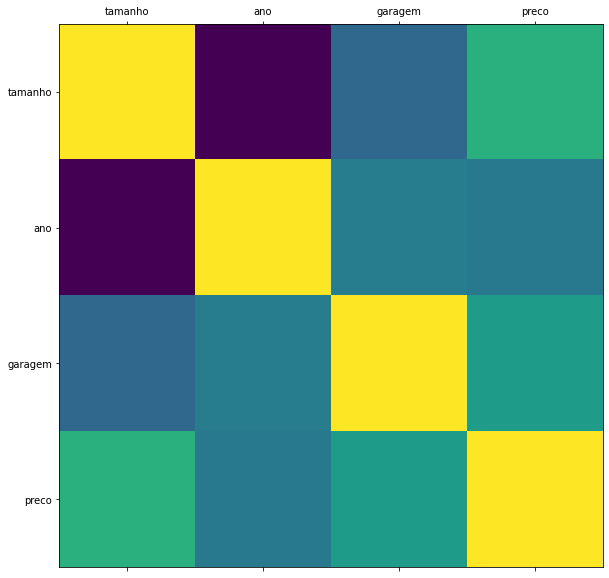

In [15]:
def plotar_correlacao(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

plotar_correlacao(df)

## Realizando trainamento do modelo

In [16]:
X = df.drop('preco', axis=1)
y = df['preco']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.head()

,tamanho,ano,garagem
615,98.0,1963,2
613,104.0,2007,0
1303,150.0,2005,3
486,100.0,1965,2
561,129.0,1974,2


In [19]:

modelo = LinearRegression(normalize = True)
modelo.fit(X_train, y_train)

LinearRegression(normalize=True)

In [20]:
modelo.predict([[120,2001,2]])

array([192030.36884536])

## Exportação do modelo

In [22]:
filename = '../dados/modelo_preco_casas.pkl'
pickle.dump(modelo, open(filename, 'wb'))